# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Zidan Qurosey Sabilla
- **Email:** zidanqs@gmail.com
- **ID Dicoding:** zidanqrs

## Menentukan Pertanyaan Bisnis

- Berapa banyak pesanan yang dimiliki untuk setiap status pada periode 2016-2018?
- Pada hari apa dalam seminggu pelanggan Brasil cenderung melakukan pembelian online dan pada waktu apa (pagi, siang, sore, malam)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Wrangling

### Gathering Data

In [2]:
import os

os.getcwd()

'e:\\Github Repo\\e-commerce-public'

In [3]:
customer = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

### Assessing Data

In [4]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [11]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
list(orders.columns[orders.isna().sum() > 0])

['order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date']

In [14]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
overview_data = pd.DataFrame({
    "Datasets" : ['customer','geolocation','order_items','order_payments','order_reviews','orders','product_category','products','sellers'],
    
    "nrows" : [len(customer),len(geolocation),len(order_items),len(order_payments),len(order_reviews),len(orders),len(product_category),len(products),len(sellers)],
    
    'ncols' : [customer.shape[1],geolocation.shape[1],order_items.shape[1],order_payments.shape[1],order_reviews.shape[1],orders.shape[1],product_category.shape[1],products.shape[1],sellers.shape[1]],
    
    'NA ammount' : [customer.isna().sum().sum(),
                    geolocation.isna().sum().sum(),
                    order_items.isna().sum().sum(),
                    order_payments.isna().sum().sum(),
                    order_reviews.isna().sum().sum(),
                    orders.isna().sum().sum(),
                    product_category.isna().sum().sum(),
                    products.isna().sum().sum(),
                    sellers.isna().sum().sum()],
    
    'NA columns' : [list(customer.columns[customer.isna().sum() > 0]),
                    list(geolocation.columns[geolocation.isna().sum() > 0]),
                    list(order_items.columns[order_items.isna().sum() > 0]),
                    list(order_payments.columns[order_payments.isna().sum() > 0]),
                    list(order_reviews.columns[order_reviews.isna().sum() > 0]),
                    list(orders.columns[orders.isna().sum() > 0]),
                    list(product_category.columns[product_category.isna().sum() > 0]),
                    list(products.columns[products.isna().sum() > 0]),
                    list(sellers.columns[sellers.isna().sum() > 0])]
                                        })

overview_data

,Datasets,nrows,ncols,NA ammount,NA columns
0,customer,99441,5,0,[]
1,geolocation,1000163,5,0,[]
2,order_items,112650,7,0,[]
3,order_payments,103886,5,0,[]
4,order_reviews,99224,7,145903,"[review_comment_title, review_comment_message]"
5,orders,99441,8,4908,"[order_approved_at, order_delivered_carrier_da..."
6,product_category,71,2,0,[]
7,products,32951,9,2448,"[product_category_name, product_name_lenght, p..."
8,sellers,3095,4,0,[]


In [16]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Cleaning Data

In [19]:
def change_to_datetime(df,columns):
    temp = df

    if type(columns) == type(list()):
        for cols in columns:
            temp[cols] = [pd.Timestamp(x) for x in temp[cols]]
    else:
        temp[columns] = [pd.Timestamp(x) for x in temp[columns]]

    return temp

In [20]:
orders_date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

orders = change_to_datetime(orders, orders_date_cols)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
orders.loc[orders['order_approved_at'].isna() == True, 'order_status'].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [23]:
orders[orders['order_status']=='delivered'].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

orders dataset have a lot missing values in columns `order_approved_at, order_delivered_carrier_date, order_delivered_customer_date` when the order status isn't delivered. It's make sense.

In [24]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [26]:
order_reviews_cols_date = ['review_creation_date', 'review_answer_timestamp']

order_reviews = change_to_datetime(order_reviews, order_reviews_cols_date)
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


order reviews dataset only have missing values in column review comment. It doesn't necessary to handle the missing values.

In [27]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
products[products['product_description_lenght'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


## Exploratory Data Analysis (EDA)

In [29]:
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [30]:
order_counts = orders['order_status'].value_counts()
order_counts

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [68]:
orders['Year'] = [x.year for x in orders['order_purchase_timestamp']]
orders.loc[orders['Year'] == 2016,'order_status'].value_counts()

order_status
delivered      267
canceled        26
invoiced        18
shipped          9
unavailable      7
processing       2
Name: count, dtype: int64

In [31]:
def to_year_month(date):
    return date.strftime('%b-%Y')

In [32]:
# Apply the to_year_month function to the 'order_purchase_timestamp' column
orders['year_month'] = orders['order_purchase_timestamp'].apply(to_year_month)

# Convert 'year_month' to datetime type
orders['year_month'] = pd.to_datetime(orders['year_month'], format='%b-%Y')

# Sort the DataFrame by 'year_month'
total_order = orders['year_month'].value_counts().sort_index().reset_index()

# Rename the columns
total_order.columns = ['Date', 'Count']
total_order['Date'] = total_order['Date'].apply(to_year_month)

total_order

,Date,Count
0,Sep-2016,4
1,Oct-2016,324
2,Dec-2016,1
3,Jan-2017,800
4,Feb-2017,1780
5,Mar-2017,2682
6,Apr-2017,2404
7,May-2017,3700
8,Jun-2017,3245
9,Jul-2017,4026


In [33]:
def get_time_of_day(input_time):
    hour = input_time.hour

    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

order_time_of_day = [get_time_of_day(x) for x in orders['order_purchase_timestamp']]
day_orders = [x.day_name() for x in orders['order_purchase_timestamp']]

order_time_of_day_series = pd.Series(order_time_of_day)
day_orders_series = pd.Series(day_orders)

order_time_of_day_counts = order_time_of_day_series.value_counts()
day_orders_counts = day_orders_series.value_counts()

print("Order Time of Day Counts:")
print(order_time_of_day_counts)

print("\nDay Orders Counts:")
print(day_orders_counts)

Order Time of Day Counts:
Day        32211
Evening    24094
Morning    22428
Night      20708
Name: count, dtype: int64

Day Orders Counts:
Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: count, dtype: int64


In [43]:
year_purchase = pd.Series([x.year for x in orders['order_purchase_timestamp']])
year_purchase.unique()

array([2017, 2018, 2016], dtype=int64)

In [34]:
year_hue = [x.year for x in orders['order_purchase_timestamp']]
month_count = [x.month_name() for x in orders['order_purchase_timestamp']]

month_count_df = pd.DataFrame({
    'Month' : month_count,
    'Year' : year_hue
})

month_count_df = month_count_df[~month_count_df['Month'].isin(['September', 'October', 'November', 'December'])]

custom_month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August'
]

month_count_df['Month'] = pd.Categorical(month_count_df['Month'], categories=custom_month_order, ordered=True)

sorted_month_count_df = month_count_df[month_count_df['Year'] != 2016].sort_values(['Year', 'Month'])

sorted_month_count_df = sorted_month_count_df.sort_values('Month')
sorted_month_count_df.value_counts()

Month     Year
January   2018    7269
March     2018    7211
April     2018    6939
May       2018    6873
February  2018    6728
August    2018    6512
July      2018    6292
June      2018    6167
August    2017    4331
July      2017    4026
May       2017    3700
June      2017    3245
March     2017    2682
April     2017    2404
February  2017    1780
January   2017     800
Name: count, dtype: int64

In [ ]:
lats = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

In [45]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


## Visualization & Explanatory Analysis

In [91]:
def format_spines(ax):
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

### Pertanyaan 1:

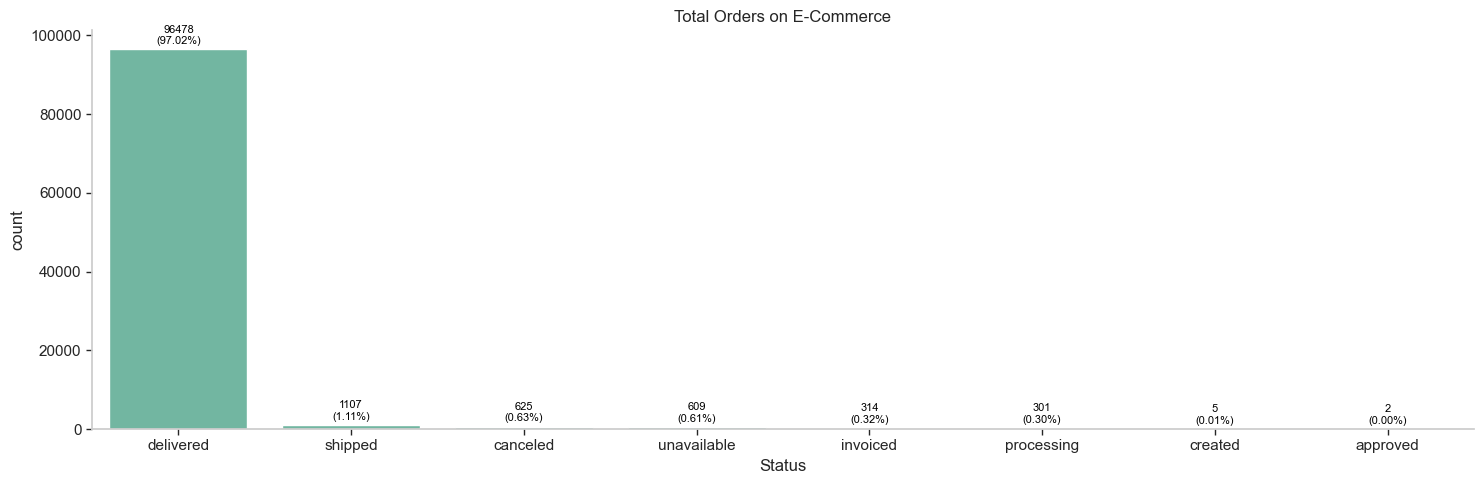

In [92]:
sns.set_theme('notebook','ticks',palette='Set2')
plt.figure(figsize=(15,5))
plt.title('Total Orders on E-Commerce')

ax = sns.countplot(data=orders, x='order_status', order=orders['order_status'].value_counts().index)
plt.xlabel('Status')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}\n({p.get_height()/len(orders)*100:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10), textcoords='offset points')

format_spines(ax)
ax.tick_params(axis='both', which='both', width=1, length=4)
ax.patch.set_facecolor('#FFFFFF')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

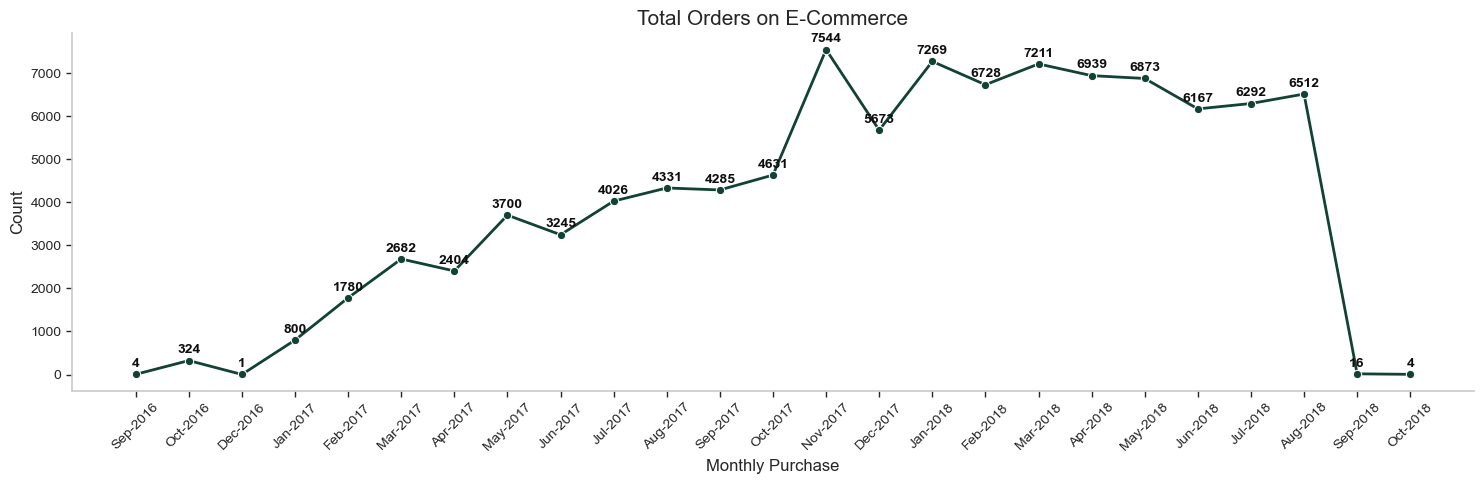

In [93]:
sns.set_theme('notebook','ticks')
plt.figure(figsize=(15,5))
plt.title('Total Orders on E-Commerce',fontsize=15)

ax = sns.lineplot(data=total_order, y='Count', x='Date', marker="o", linewidth=2, color='#114232')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax.tick_params(axis='both', which='both', width=1, length=4)
plt.xlabel('Monthly Purchase', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in total_order.iterrows():
    ax.text(value['Date'], value['Count']+100, str(value['Count']),
            ha='center', va='bottom', fontsize=10, color='#0F0D0D', fontweight='bold')

format_spines(ax)
plt.tight_layout()
plt.show()

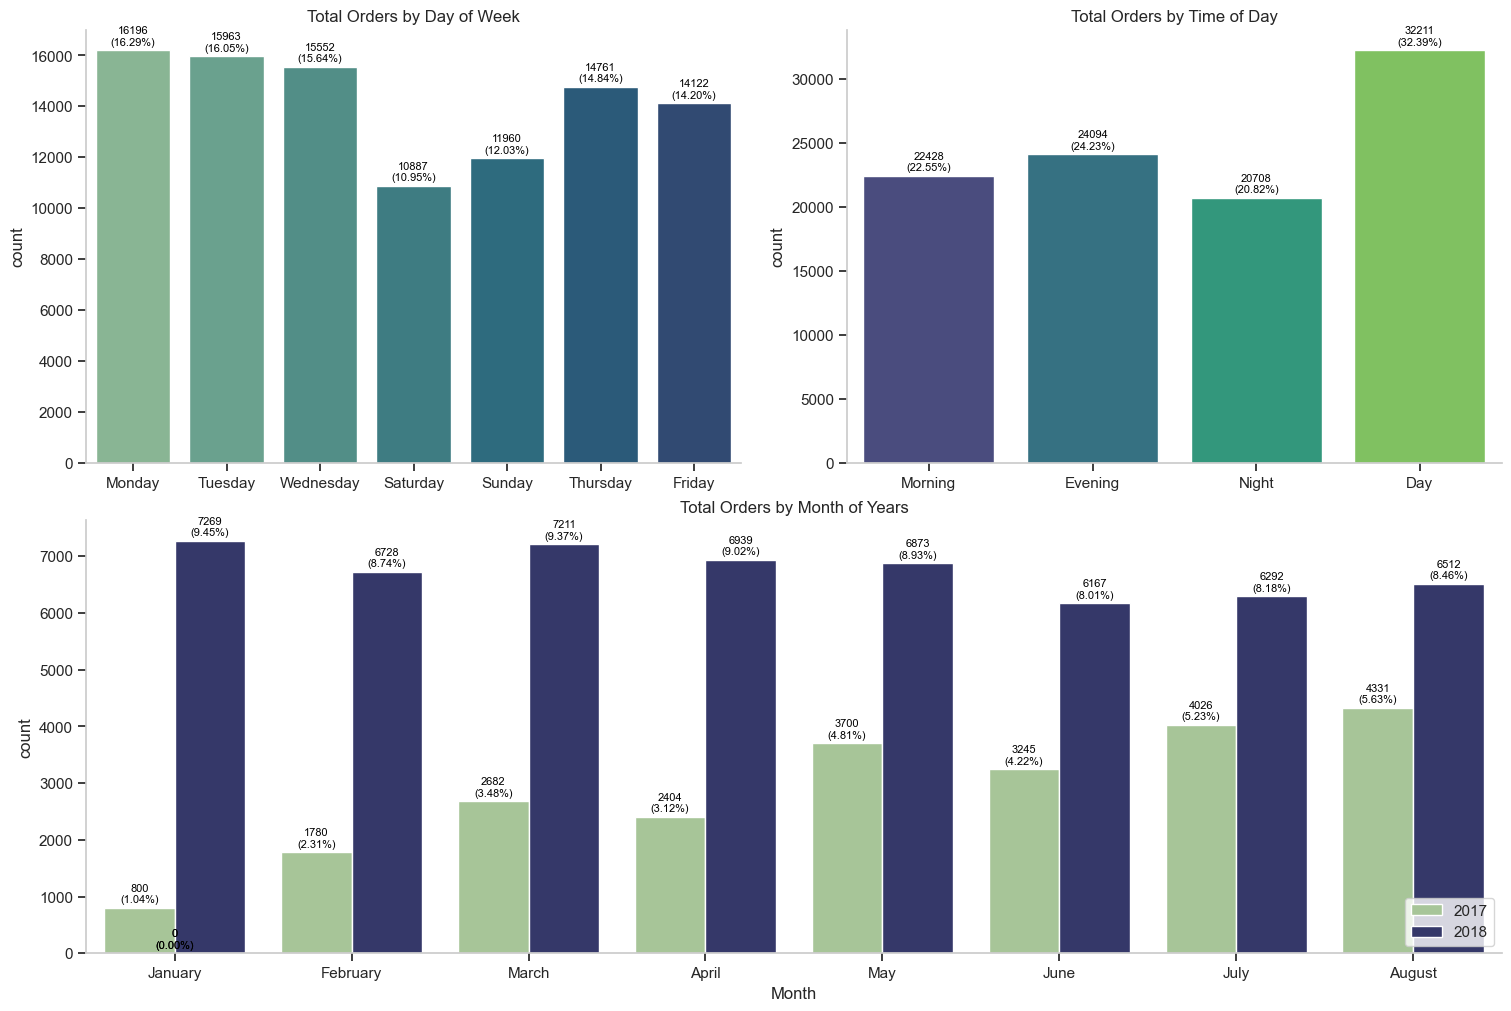

In [94]:
sns.set_theme('notebook','ticks')
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(2, 2)

ax1 = plt.subplot(gs[0,0])
day_orders_plot = sns.countplot(x = day_orders, palette='crest', hue=day_orders)
ax1.set_title('Total Orders by Day of Week')

for p in day_orders_plot.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}\n({height / len(day_orders) * 100:.2f}%)',
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                   textcoords='offset points')

ax2 = plt.subplot(gs[0,1])   
order_time_of_day_plot = sns.countplot(x = order_time_of_day, palette='viridis', hue=order_time_of_day)
ax2.set_title('Total Orders by Time of Day')

for p in order_time_of_day_plot.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}\n({height / len(order_time_of_day) * 100:.2f}%)',
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                   textcoords='offset points')

ax3 = plt.subplot(gs[1,:])   
month_count_plot = sns.countplot(x = sorted_month_count_df['Month'],
                                 hue = sorted_month_count_df['Year'], palette='crest')
ax3.set_title('Total Orders by Month of Years')
ax3.legend(loc=4)

for p in month_count_plot.patches:
    height = p.get_height()
    ax3.annotate(f'{int(height)}\n({height / len(sorted_month_count_df) * 100:.2f}%)',
                   (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                   textcoords='offset points')

format_spines(day_orders_plot)
format_spines(order_time_of_day_plot)
format_spines(month_count_plot)

#plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2